In [98]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import SimpleITK as sitk

from skimage.measure import label as sklabel 


In [99]:
def binarize_mask(mask):
    # Binarize mask
    mask = np.uint8(mask > 128)
    return mask

def getLargestCC(segmentation):
    labels = sklabel(segmentation)
    largestCC = labels == np.argmax(np.bincount(labels.flat, weights=segmentation.flat))
    return largestCC


In [100]:
label = '/data/KPIs24/KPIs24 Training Data/Task1_patch_level/data/56Nx/12_116/mask/56Nx_12_116_24_5120_1024_mask.jpg'
label_image = cv2.imread(label, cv2.IMREAD_GRAYSCALE)
label_image = binarize_mask(label_image)

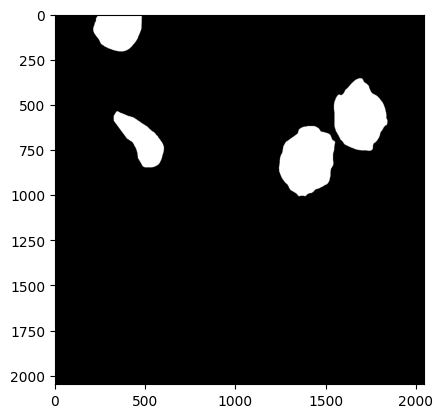

In [101]:
plt.imshow(label_image, cmap='gray')

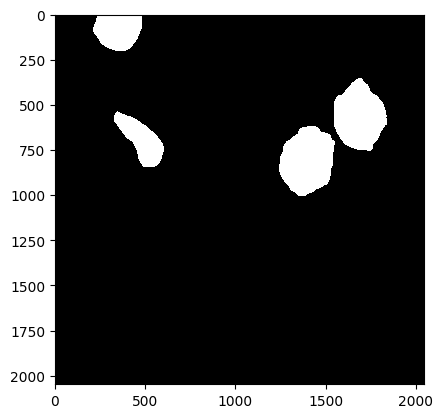

In [102]:
border_mask = np.zeros_like(label_image)
border_mask[0:2, :] = 1
border_mask[-2:, :] = 1
border_mask[:, 0:2] = 1
border_mask[:, -2:] = 1
#union of border and label
union = np.logical_or(label_image, border_mask).astype(np.uint8)
plt.imshow(union, cmap='gray', interpolation='none')

In [103]:
num_labels_union, labels_union = cv2.connectedComponents(union)
num_labels_label, labels_label = cv2.connectedComponents(label_image)


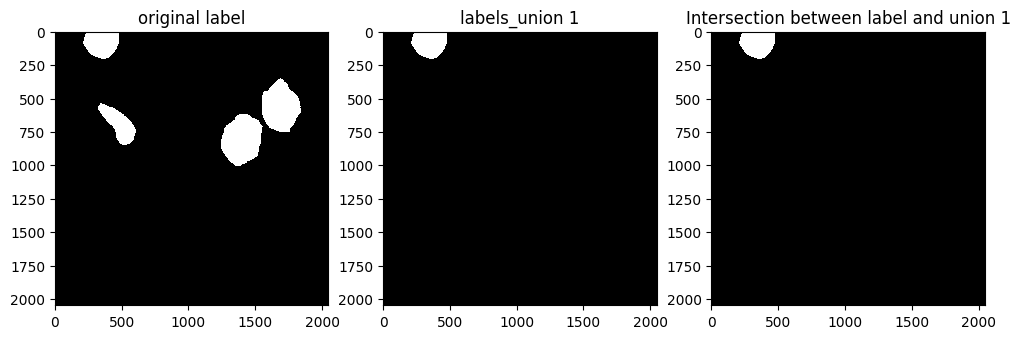

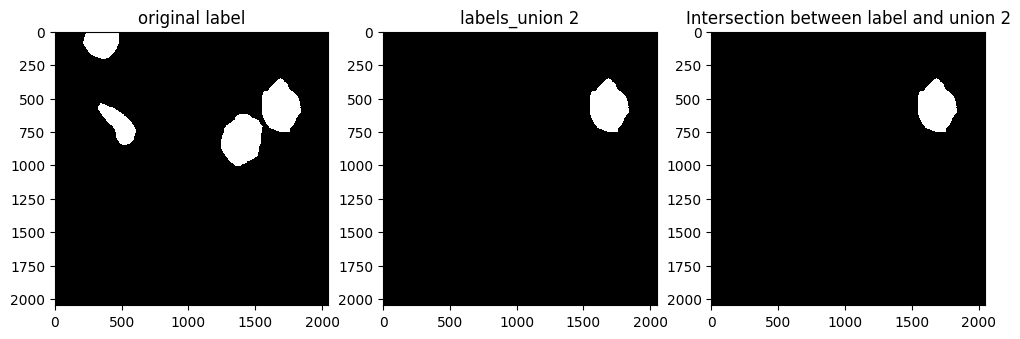

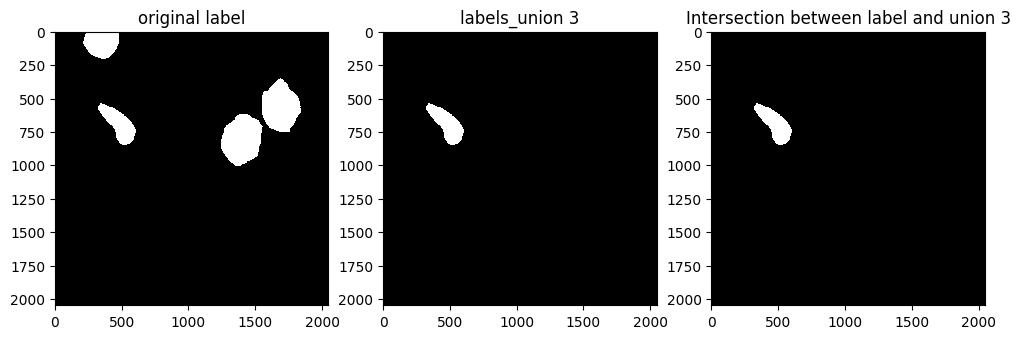

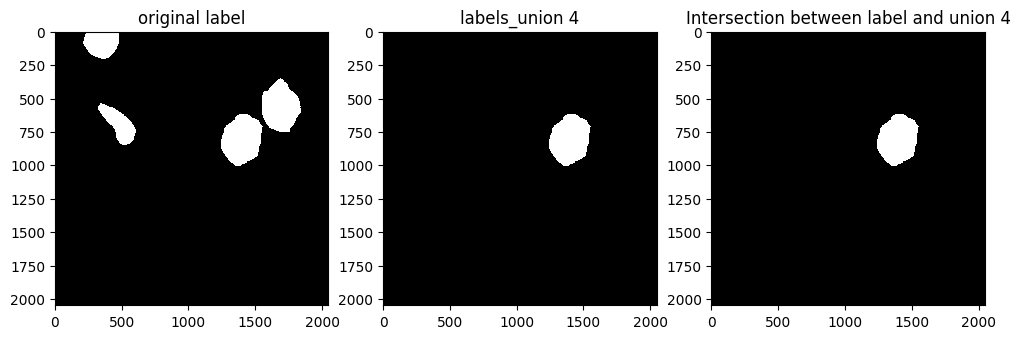

In [105]:
for j in range(1, num_labels_union):
    intersection = np.logical_and(label_image, labels_union == j)
    
    plt.figure(figsize=(12, 4))
    
    plt.subplot(1, 3, 1)
    plt.imshow(label_image, cmap='gray', interpolation='none')
    plt.title(f'original label')
    
    plt.subplot(1, 3, 2)
    plt.imshow(labels_union == j, cmap='gray', interpolation='none')
    plt.title(f'labels_union {j}')
    
    plt.subplot(1, 3, 3)
    plt.imshow(intersection, cmap='gray', interpolation='none')
    plt.title(f'Intersection between label and union {j}')
    
    plt.show()


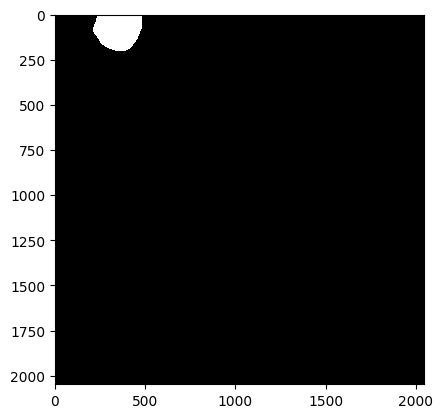

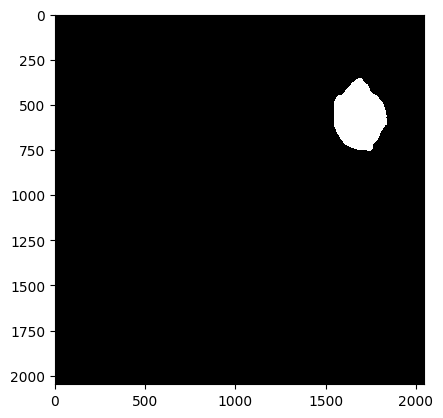

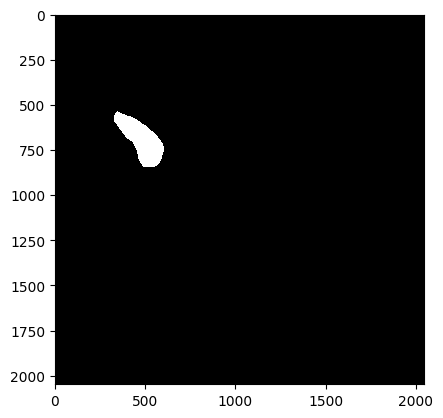

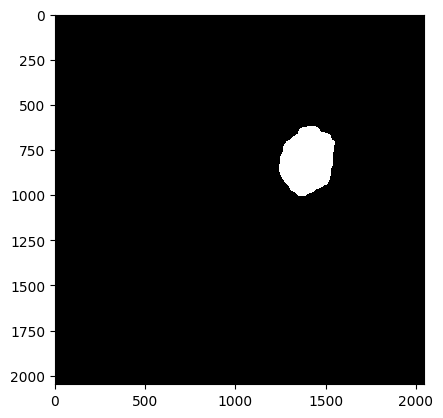

In [85]:
for i in range(1, num_labels_union):
    mask = np.uint8(labels_union == i)
    plt.figure()
    plt.imshow(mask, cmap='gray', interpolation='none')

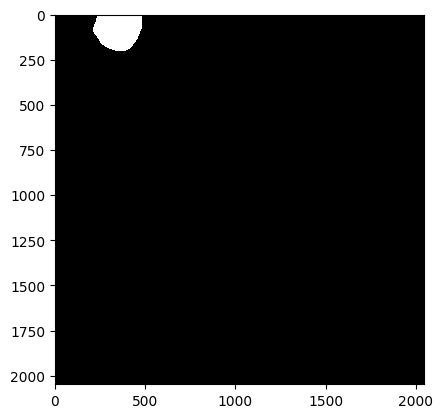

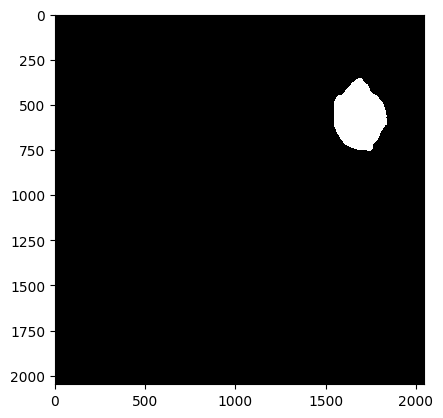

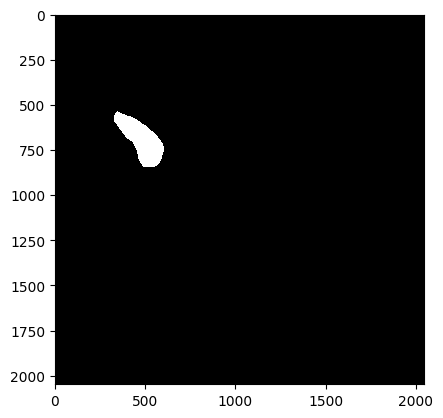

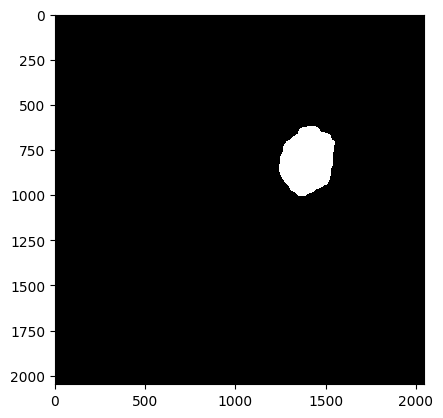

In [86]:
for i in range(1, num_labels_label):
    mask = np.uint8(labels_label == i)
    plt.figure()
    plt.imshow(mask, cmap='gray', interpolation='none')

In [88]:
largestCC

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

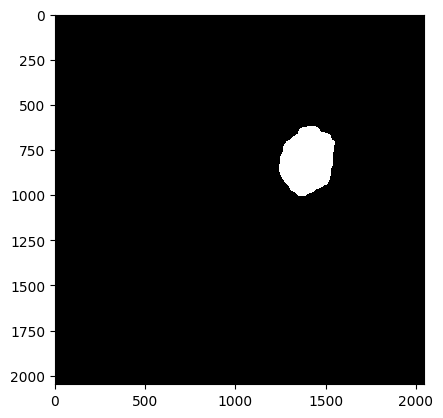

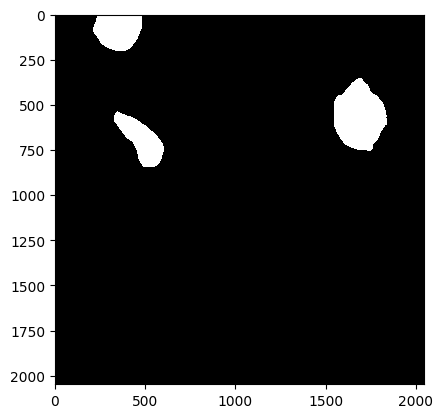

In [90]:
#select only the labels in labels_label that not intersect with largest connected component in labels_union
#get the largest connected component in labels_union
largestCC = getLargestCC(union)

plt.figure()
plt.imshow(largestCC, cmap='gray', interpolation='none')

#select only the labels in labels_label that not intersect with largest connected component in labels_union
labels = np.unique(labels_label)
labels = labels[labels != 0]
for label in labels:
    if np.sum(largestCC[labels_label == label]) > 0:
        label_image[labels_label == label] = 0
plt.figure()
plt.imshow(label_image, cmap='gray', interpolation='none')
        